# Convergence of trapezoidal integration

We approximate the integral of the function $f(x)=e^{\sin 7x}$ over the interval $[0,2]$.

In [1]:
f = x -> exp(sin(7*x));
a = 0;  b = 2;

In lieu of the exact value, we will use the `QuadGK` package to find an accurate result.

In [2]:
using QuadGK
I,errest = quadgk(f,a,b,atol=1e-14,rtol=1e-14);
println("Integral = $I")

Integral = 2.6632197827615394


Here is the error at $n=40$.

In [4]:
using FundamentalsNumericalComputation

T,t,y = FNC.trapezoid(f,a,b,40)
@show T;
@show err = I - T;

T = 2.6623029356022876
err = I - T = 0.0009168471592517768


In order to check the order of accuracy, we double $n$ a few times and observe how the error decreases.

In [5]:
n = @. 40*2^(0:5)
err = zeros(size(n));
for (k,n) = enumerate(n)
    T,t,y = FNC.trapezoid(f,a,b,n)
    err[k] = I - T
end

using DataFrames
DataFrame(n=n,error=err)

,n,error
,Int64,Float64
1,40,0.000916847
2,80,0.000230065
3,160,5.75676e-5
4,320,1.43951e-5
5,640,3.59897e-6
6,1280,8.99754e-7


Each doubling of $n$ cuts the error by a factor of about 4, which is consistent with second-order convergence. Another check: the slope on a log-log graph should be $-2$.

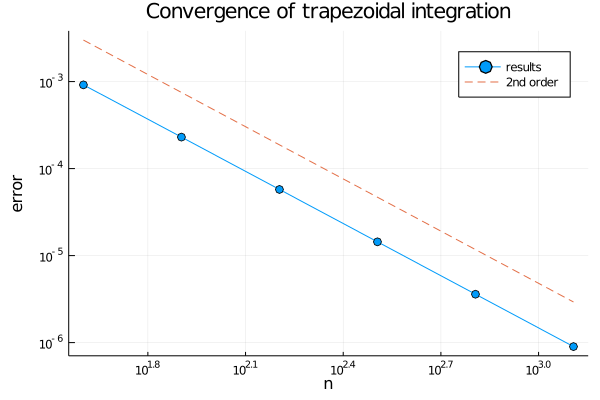

In [7]:
using Plots

plot(n,abs.(err),m=:o,label="results",
    xaxis=(:log10,"n"),yaxis=(:log10,"error"),title="Convergence of trapezoidal integration")
plot!(n,3e-3*(n/n[1]).^(-2),l=:dash,label="2nd order")